<img src="http://stemfellowship.org/wp-content/uploads/2016/10/STEMF-logo-blue-no-back-6.png" alt="STEM Fellowship" style="width:500px;height:120px;">

<h1 style="font-family:georgia;"><p style="text-align: center;"> Welcome to the Python for Data Science Example Analysis! </p></h1>

The Big Data Challenge is a wonderful opportunity to learn new skills in a growing field of STEM, but we know how tough it can be to do something for the first time. These workshops were developed to help newcomers to coding and to Data Science grow comfortable with programming and the Data Science process.  
Have a burning question you want to ask? Feel free to contact us with any comments, questions, or concerns.<br><br>
Best wishes,  
The Data Science Team

## THE PROBLEM
An interesting fact about space launches is that solid-fuel rockets emit chlorine gas that can destroy the ozone in the stratosphere. If space travel is in our future, does that mean that the ozone layer is doomed?
Well, not necessarily. SpaceX rockets, for example, are liquid-fuel and don't contain the chlorine that solid-fuel rockets do. They're also promising products in the development of space travel. To see if these rockets are the solution to ozone-friendly space travel, we can take a look at ozone levels over time and make note of when SpaceX launches occur.
Additionally, we can see if there are any other factors to look into with SpaceX Launches.

## SETUP
To download Python, follow the instructions here.  
Recommended: The python3 Jupyter Kernel
We will also be using Pandas, Python's data analytics library

In [15]:
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
from datetime import datetime
import numpy as np

## DATA
The first thing to do is to gather data. We want our data to comprise SpaceX Launches and ozone concentrations. Since that combination is pretty specific, our best bet is to find data on ozone concentrations and data on SpaceX Launches and then combine them.
For this data
We want data on SpaceX Launches first, so that's where we'll start!

Python supports reading different types of data files, but we'll be dealing with **.csv**, or comma-separated value files. Additionally, there are a few different ways of accessing data - using a direct link, downloading the data and referencing the file, or using an API. For this dataset, we can look at how to use to bring in SpaceX Launch data using a direct link.
The dataset we are referencing was [taken from Kaggle](https://www.kaggle.com/scoleman/spacex-launch-data) and can be found in the GitHub for the 2019 BDC Workshops [here](https://github.com/bigdatachallenge/2019_bdc_workshops/blob/master/spacex_launch_data.csv). In order for Python to be able to interpret the data, we need it to be in raw format. You can access this format by pressing the 'Raw' button or by clicking [here](https://raw.githubusercontent.com/bigdatachallenge/2019_bdc_workshops/master/spacex_launch_data.csv).)
(By the way, now you know why it's called a comma-separated value file!)

So now we have a link!
https://github.com/bigdatachallenge/2019_bdc_workshops/blob/master/spacex_launch_data.csv

To start with, Pandas have a `read_csv()` function that can turn our data into a data frame. Let's **store the data** into a **variable** called SpaceX_Launches.

In [16]:
SpaceX_Launches = pd.read_csv('https://raw.githubusercontent.com/bigdatachallenge/2019_bdc_workshops/master/Datasets/Example_Analysis/spacex_launch_data.csv')

We can take a look at the first five rows of our dataset using the `head()` function.

In [17]:
SpaceX_Launches.head()

,Flight Number,Date,Time (UTC),Booster Version,Launch Site,Payload,Payload Mass (kg),Orbit,Customer,Mission Outcome,Landing Outcome
0,1,2010-06-04,18:45:00,F9 v1.0 B0003,CCAFS LC-40,Dragon Spacecraft Qualification Unit,NaN,LEO,SpaceX,Success,Failure (parachute)
1,2,2010-12-08,15:43:00,F9 v1.0 B0004,CCAFS LC-40,"Dragon demo flight C1, two CubeSats, barrel o...",NaN,LEO (ISS),NASA (COTS) NRO,Success,Failure (parachute)
2,3,2012-05-22,7:44:00,F9 v1.0 B0005,CCAFS LC-40,Dragon demo flight C2+,525,LEO (ISS),NASA (COTS),Success,No attempt
3,4,2012-10-08,0:35:00,F9 v1.0 B0006,CCAFS LC-40,SpaceX CRS-1,500,LEO (ISS),NASA (CRS),Success,No attempt
4,5,2013-03-01,15:10:00,F9 v1.0 B0007,CCAFS LC-40,SpaceX CRS-2,677,LEO (ISS),NASA (CRS),Success,No attempt


Now that we have our data, we should get an idea of what our data contains. We can do this using the `describe()` function in Pandas.

In [18]:
SpaceX_Launches.describe()

,Flight Number,Date,Time (UTC),Booster Version,Launch Site,Payload,Payload Mass (kg),Orbit,Customer,Mission Outcome,Landing Outcome
count,57,57,57,57,57,57,55,57,57,57,57
unique,57,57,55,53,4,57,48,8,30,3,12
top,38,2015-04-14,4:45:00,F9 v1.1,CCAFS LC-40,SpaceX CRS-9,"9,600",GTO,NASA (CRS),Success,No attempt
freq,1,1,2,5,26,1,5,22,14,55,18


This gives us some insight into what our data is saying. We see that it spans the years from 2010 to 2018, with the median being at 2017. We can see there are fifty-seven flights recorded by the length indicated under each variable.
<br><br>Now let's inspect the data types of the columns

In [19]:
SpaceX_Launches.dtypes

Flight Number        object
Date                 object
Time (UTC)           object
Booster Version      object
Launch Site          object
Payload              object
Payload Mass (kg)    object
Orbit                object
Customer             object
Mission Outcome      object
Landing Outcome      object
dtype: object

It looks like we have a problem; the `Payload Mass` is an `object` type when it should be a converted into a `float` type. By converting numeric columns into numeric types, we can run statistical analyses on those columns.

With this insight, we are ready to start cleaning. Let's take a look at the `Payload Mass` column.

In [20]:
SpaceX_Launches['Payload Mass (kg)']

0            NaN
1            NaN
2           525 
3           500 
4           677 
5           500 
6         3,170 
7         3,325 
8         2,296 
9         1,316 
10        4,535 
11        4,428 
12        2,216 
13        2,395 
14          570 
15        4,159 
16        1,898 
17        4,707 
18        1,952 
19        2,034 
20          553 
21        5,271 
22        3,136 
23        4,696 
24        3,100 
25        3,600 
26        2,257 
27        4,600 
28        9,600 
29        2,490 
30        5,600 
31        5,300 
32    Classified
33        6,070 
34        2,708 
35        3,669 
36        9,600 
37        6,761 
38        3,310 
39          475 
40        4,990 
41        9,600 
42        5,200 
43        3,500 
44        2,205 
45        9,600 
46    Classified
47        4,230 
48       ~1,250 
49        2,150 
50        6,092 
51        9,600 
52        2,647 
53          362 
54        3,600 
55        6,460 
56        5,384 
Name: Payload Mass (kg), dtype:

We can immediately understand why the data is an object - there are 'Classified' values and a value that estimates with a tilde in front of it. Lastly, there are spaces at the end of every value. We can modify these columns using the map and string index functions.

In [21]:
SpaceX_Launches['Payload Mass (kg)'] = SpaceX_Launches['Payload Mass (kg)'].map(lambda x: str(x).replace(",",""))
SpaceX_Launches['Payload Mass (kg)'] = SpaceX_Launches['Payload Mass (kg)'].map(lambda x: x.strip())
SpaceX_Launches['Payload Mass (kg)'] = SpaceX_Launches['Payload Mass (kg)'].map(lambda x: -999 if x == "Classified" else x)
SpaceX_Launches['Payload Mass (kg)'] = SpaceX_Launches['Payload Mass (kg)'].map(lambda x: str(x).replace("~",""))
SpaceX_Launches['Payload Mass (kg)'] = SpaceX_Launches['Payload Mass (kg)'].map(lambda x: -999 if x == "nan" else x)
SpaceX_Launches['Payload Mass (kg)']

0     -999
1     -999
2      525
3      500
4      677
5      500
6     3170
7     3325
8     2296
9     1316
10    4535
11    4428
12    2216
13    2395
14     570
15    4159
16    1898
17    4707
18    1952
19    2034
20     553
21    5271
22    3136
23    4696
24    3100
25    3600
26    2257
27    4600
28    9600
29    2490
30    5600
31    5300
32    -999
33    6070
34    2708
35    3669
36    9600
37    6761
38    3310
39     475
40    4990
41    9600
42    5200
43    3500
44    2205
45    9600
46    -999
47    4230
48    1250
49    2150
50    6092
51    9600
52    2647
53     362
54    3600
55    6460
56    5384
Name: Payload Mass (kg), dtype: object

Now that the characters are all readable numbers, we can convert them to numeric values.

In [22]:
SpaceX_Launches['Payload Mass (kg)'] = pd.to_numeric(SpaceX_Launches['Payload Mass (kg)'])

That looks great! Let's set the date column as the index of our data frame. This helps us to query for data within certain dates and also introduces an x-axis to our plots.

In [23]:
SpaceX_Launches["Date"] = SpaceX_Launches["Date"].astype('datetime64[ns]')
SpaceX_Launches = SpaceX_Launches.set_index('Date')
SpaceX_Launches.index = SpaceX_Launches.index.floor('1H')

All cleaned up! Now, this is cleaner data. Maybe we can even plot it on a graph!

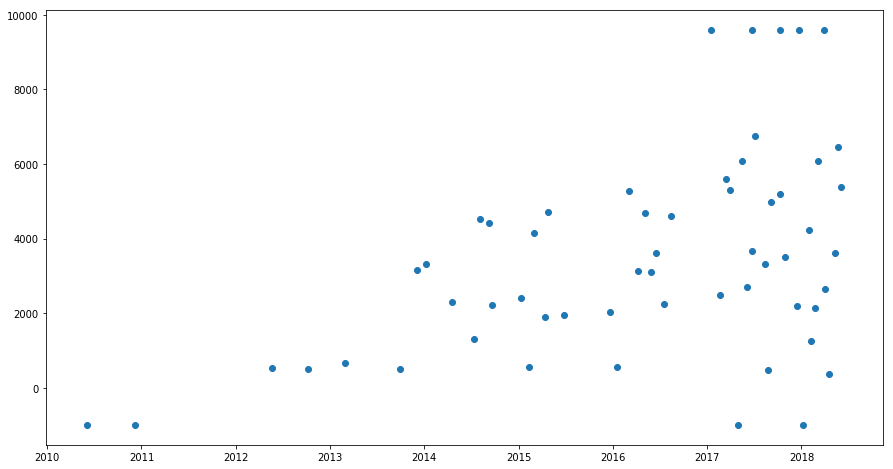

In [24]:
plt.rcParams['figure.figsize'] = [15, 8] # Just reshaping the image
plt.scatter(SpaceX_Launches["Payload Mass (kg)"].index, SpaceX_Launches["Payload Mass (kg)"])
plt.show()

As time goes on, SpaceX seems to have launched heavier and heavier rockets. Interesting!  
But let's not forget what we're here for - we want to look at the levels of ozone and compare them to rocket launch dates. So the first thing is to look at our ozone data. This time, the data is in folders that contain information on different types of gases. It'll be easier to download the data and import it by referencing the file. To do this easily...<br>
*Note: the data should be shared with you on Google Drive*

1. Make a folder for your data to be in.

 *Name this folder something like 'Workshop Working Directory'.*
 
 
2. Extract the data into that folder.

 *Use a program like WinRAR (Windows) or the Archine Utility (Mac).*


3. Create a path variable that points to that directory

In [25]:
path = '/Users/curtis/Desktop/analysis/2019_bdc_workshops/Datasets/Example_Analysis/' # Don't forget the backslash at the end!

If you go to your working directory folder, you'll see 'The Four Gases in Cohorts' has been extracted into a folder. Clicking on this takes you to... four more folders, each with the name of a different gas - Carbon Dioxide, Nitrogen Dioxide, Ozone, and Sulfur Dioxide. Clicking on the Ozone folder, you get a bunch of .csv files! There's way too many to work with. Luckily, each file corresponds to data in three-year intervals. To find out what data we should import, we can check to see the years the most common launches occurred in.

To do this, we can look at the `.index` of the data frame, select the `year` in the `Datetime` object, and use `value_counts()` to list the number of launches that happened each year.

In [26]:
SpaceX_Launches.index.year.value_counts()

2017    18
2018    11
2016     8
2015     7
2014     6
2013     3
2012     2
2010     2
Name: Date, dtype: int64

Conveniently (and somewhat predictably), the three years with the most flights are the three latest consecutive ones - 2016, 2017, and 2018. So, we can safely import the ozone data from years 2016-2018. Let's save it in a variable called `Ozone_Data`.

In [27]:
Ozone_Data = pd.read_csv(path + 'The Four Gases in Cohorts/Ozone/Ozone levels from 2016 to 2018.csv')

Fantastic! It seems that all the columns have been parsed. To take a peek at our data, we can use the `head()` function.

In [28]:
Ozone_Data.head()

,State.Code,County.Code,Site.Num,Parameter.Code,POC,Latitude,Longitude,Datum,Parameter.Name,Sample.Duration,...,AQI,Method.Code,Method.Name,Local.Site.Name,Address,State.Name,County.Name,City.Name,CBSA.Name,Date.of.Last.Change
0,1,3,10,44201,1,30.497478,-87.880258,NAD83,Ozone,8-HR RUN AVG BEGIN HOUR,...,37,NaN,-,"FAIRHOPE, Alabama","FAIRHOPE HIGH SCHOOL, 1 PIRATE DRIVE, FAIRHOPE...",Alabama,Baldwin,Fairhope,"Daphne-Fairhope-Foley, AL",2017-01-04
1,1,3,10,44201,1,30.497478,-87.880258,NAD83,Ozone,8-HR RUN AVG BEGIN HOUR,...,36,NaN,-,"FAIRHOPE, Alabama","FAIRHOPE HIGH SCHOOL, 1 PIRATE DRIVE, FAIRHOPE...",Alabama,Baldwin,Fairhope,"Daphne-Fairhope-Foley, AL",2017-01-04
2,1,3,10,44201,1,30.497478,-87.880258,NAD83,Ozone,8-HR RUN AVG BEGIN HOUR,...,39,NaN,-,"FAIRHOPE, Alabama","FAIRHOPE HIGH SCHOOL, 1 PIRATE DRIVE, FAIRHOPE...",Alabama,Baldwin,Fairhope,"Daphne-Fairhope-Foley, AL",2017-01-04
3,1,3,10,44201,1,30.497478,-87.880258,NAD83,Ozone,8-HR RUN AVG BEGIN HOUR,...,36,NaN,-,"FAIRHOPE, Alabama","FAIRHOPE HIGH SCHOOL, 1 PIRATE DRIVE, FAIRHOPE...",Alabama,Baldwin,Fairhope,"Daphne-Fairhope-Foley, AL",2017-01-04
4,1,3,10,44201,1,30.497478,-87.880258,NAD83,Ozone,8-HR RUN AVG BEGIN HOUR,...,44,NaN,-,"FAIRHOPE, Alabama","FAIRHOPE HIGH SCHOOL, 1 PIRATE DRIVE, FAIRHOPE...",Alabama,Baldwin,Fairhope,"Daphne-Fairhope-Foley, AL",2017-01-04


There seems to be a lot of columns - in fact, there's a '...', representing that the `head()` function skipped a few columns when showing the first six rows. This happens to datasets with a large number of columns.

To further our investigation, we can check the number of rows and the number of columns our dataset has with the `.shape` attribute. The number of rows is represented by the first index in the returned tuple and the number of columns is represented by the second index.

In [29]:
Ozone_Data.shape

(839893, 29)

That's a lot of columns! It's very unlikely that all of them are going to be useful to us. To check out the names of these columns, including the "hidden" ones that the `head()` function isn't showing us, we can use the `.columns` attribute.

In [30]:
Ozone_Data.columns

Index(['State.Code', 'County.Code', 'Site.Num', 'Parameter.Code', 'POC',
       'Latitude', 'Longitude', 'Datum', 'Parameter.Name', 'Sample.Duration',
       'Pollutant.Standard', 'Date.Local', 'Units.of.Measure', 'Event.Type',
       'Observation.Count', 'Observation.Percent', 'Arithmetic.Mean',
       'X1st.Max.Value', 'X1st.Max.Hour', 'AQI', 'Method.Code', 'Method.Name',
       'Local.Site.Name', 'Address', 'State.Name', 'County.Name', 'City.Name',
       'CBSA.Name', 'Date.of.Last.Change'],
      dtype='object')

How do we decide what stays and what we should keep? There seem to be an endless amount of choices! One way to lessen the load is to take a look at the **Readme** file for this dataset. The Readme file can be found [here](https://aqs.epa.gov/aqsweb/airdata/FileFormats.html#_daily_summary_files).

Reading it, it seems we want to keep location info, time info, and info the best summarizes the measurement of the day.

**Location Data**  
Things like `Address` or `City.Name` might actually give us too much information, or information not easily worked with, so let's keep `Longitude` and `Latitude`. This is numeric data that is easier to quantify.
As well, the Readme file describes the `Site.Num` column as _a unique number within the county identifying the site_, which could also be useful in singling out sites!
Lastly, to have something left to more easily compare the SpaceX Launch data, we'll leave in `County.Name`.

_Let's keep `Site.Num`, `Latitude`, `Longitude`, and `County.Name`._

**Time Data**  
For this, we'll take the local date. Remember, this is the date according to local measurements, so we'd have to consider this if we want to work with timezones.

_Let's keep `Date.Local`._

**Measurements**  
There's a load of data here, but generally we can keep the measurements for the Arithmetic Mean of the ozone concentration, the units of measurements they're in (in case we have to convert) and, for the sake of investigation and interest, we can keep the Air Quality Index to compare the effect of ozone concentration.

_Let's keep `Arithmetic.Mean` and `AQI`._

In [31]:
Ozone_Data = Ozone_Data[['Site.Num', 'Latitude', 'Longitude', 'Date.Local', 'Units.of.Measure', 'Arithmetic.Mean', 'AQI', 'County.Name']]
Ozone_Data.head()

,Site.Num,Latitude,Longitude,Date.Local,Units.of.Measure,Arithmetic.Mean,AQI,County.Name
0,10,30.497478,-87.880258,2016-03-01,Parts per million,0.034273,37,Baldwin
1,10,30.497478,-87.880258,2016-03-02,Parts per million,0.025294,36,Baldwin
2,10,30.497478,-87.880258,2016-03-03,Parts per million,0.033353,39,Baldwin
3,10,30.497478,-87.880258,2016-03-04,Parts per million,0.030059,36,Baldwin
4,10,30.497478,-87.880258,2016-03-05,Parts per million,0.032176,44,Baldwin


Excellent! Let's take a look at a variable more closely, the one in the fifth column: Units of Measure. This will give us an indication of any unit conversions that we might need to do. Using the `unique()` function, we can find all the unique units of measurement, and then choose one to convert all the others too.

In [32]:
Ozone_Data["Units.of.Measure"].unique()

array(['Parts per million'], dtype=object)

How convenient! No unit conversions are necessary. As such, we can simply make a note of our units and get rid of this column. Before we do that, however, why not investigate if we can get rid of any other columns?

What about the `Site.Num` variable that we mentioned before? If every measurement location had a unique number when doing things like merging datasets would be a lot easier because we have an identifier! To verify that each location has a unique site number attached to it, we can take the number of unique sites using the `len()` and `unique()` functions and subtract from it the number of unique Latitude measurements. If `Site.Num` and location are perfectly related, we should expect a difference of 0, or perhaps 1 or -1 to account for some error.

In [33]:
len(Ozone_Data["Site.Num"].unique())-len(Ozone_Data["Latitude"].unique())

-1030

Whoa - this is way crazier than 0! Either `Site.Num` isn't perfectly related to location, or there is some sort of grouping going on. In either case, the `Site.Num` variable isn't doing what we want it to do. Both this column and the `Units.of.Measure` column can safely be removed. To do so, we should use the `drop()` function.

In [34]:
Ozone_Data = Ozone_Data.drop(["Site.Num","Units.of.Measure"],axis=1)
Ozone_Data.head()

,Latitude,Longitude,Date.Local,Arithmetic.Mean,AQI,County.Name
0,30.497478,-87.880258,2016-03-01,0.034273,37,Baldwin
1,30.497478,-87.880258,2016-03-02,0.025294,36,Baldwin
2,30.497478,-87.880258,2016-03-03,0.033353,39,Baldwin
3,30.497478,-87.880258,2016-03-04,0.030059,36,Baldwin
4,30.497478,-87.880258,2016-03-05,0.032176,44,Baldwin


Voilà: a sleek dataset. Perhaps to make it a little easier to reference, we can change `County.Name` to just `County`. We can do this by using the `rename()` function.

In [35]:
Ozone_Data = Ozone_Data.rename(index=str, columns={"County.Name": "County"})

Excellent! Now that that is done, we can take a look at a summarized version of our data using the function `summary()`.

In [36]:
Ozone_Data.describe()

,Latitude,Longitude,Arithmetic.Mean,AQI
count,839893.000000,839893.000000,839893.000000,839893.000000
mean,37.616343,-95.473783,0.032082,39.850876
std,4.978297,16.296415,0.011095,17.333311
min,18.177939,-158.088613,-0.000647,0.000000
25%,34.093959,-110.599472,0.024294,31.000000
50%,38.339905,-92.006318,0.032000,37.000000
75%,40.995848,-82.131249,0.039529,44.000000
max,64.845690,-65.915482,0.105176,233.000000


Here we can see a few useful tips about our data. There seems to be a day where the Air Quality Index is 0... which doesn't seem all that likely. Most strangely, we see that there are days where the `Arithmetic.Mean` of the measurements is... negative? That doesn't seem right. Perhaps it would pay off to take a closer look at these negative outliers. We can do this by using a **conditional index**.

In [37]:
outliers = Ozone_Data[Ozone_Data["Arithmetic.Mean"]<0]

Let's take a look using the `head()` function.

In [38]:
outliers.head()

,Latitude,Longitude,Date.Local,Arithmetic.Mean,AQI,County
626083,41.207958,-95.945897,2017-10-05,-0.000647,0,Douglas


Thankfully, there is only one. Note that the `AQI`, in this case, is 0 as well - another abnormality we noted earlier. In this case, we can usually delete the entry without a problem.

In [39]:
Ozone_Data = Ozone_Data[-Ozone_Data["Arithmetic.Mean"]<0]

Let's take a look at the summary of our dataset again.

In [40]:
Ozone_Data.describe()

,Latitude,Longitude,Arithmetic.Mean,AQI
count,839357.000000,839357.000000,839357.000000,839357.000000
mean,37.619040,-95.467478,0.032103,39.876324
std,4.977400,16.298041,0.011068,17.309556
min,18.177939,-158.088613,0.000059,1.000000
25%,34.100020,-110.599472,0.024353,31.000000
50%,38.339905,-92.006318,0.032000,37.000000
75%,40.995848,-82.131249,0.039529,44.000000
max,64.845690,-65.915482,0.105176,233.000000


Splendid - the Arithmetic Mean is back to reasonable results, and now the minimum `AQI` is 1!

What about some parameters? Let's take a look at the standard deviation of our ozone measurements.

In [41]:
Ozone_Data["Arithmetic.Mean"].std()

0.011068373195029485

A standard deviation of 0.011 parts per million and the mean is 0.032 parts per million. But what does that mean? What kind of distribution does this data follow? It may be more useful to use data visualization here.

Let's make a histogram using the `hist()` function.

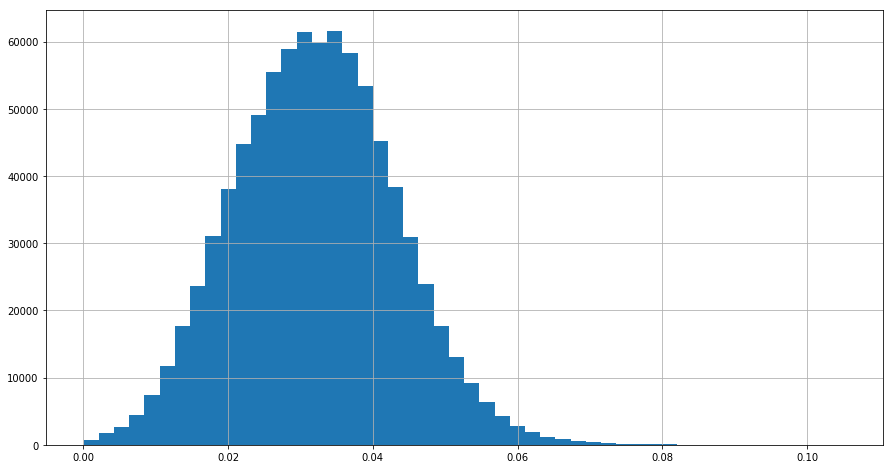

In [42]:
Ozone_Data["Arithmetic.Mean"].hist(bins=50)

Aha! This *does* seem to be a normal distribution.

Let's try to highlight this!

Unfortunately, Pandas' visualization tools are quite limited so we'll use Seaborn's `distplot()` function.
To highlight this, let's add a line using the `lines()` function. Let's colour it red and turn the kernel density estimate to True. You can play around with these parameters yourself to see how it affects the line.

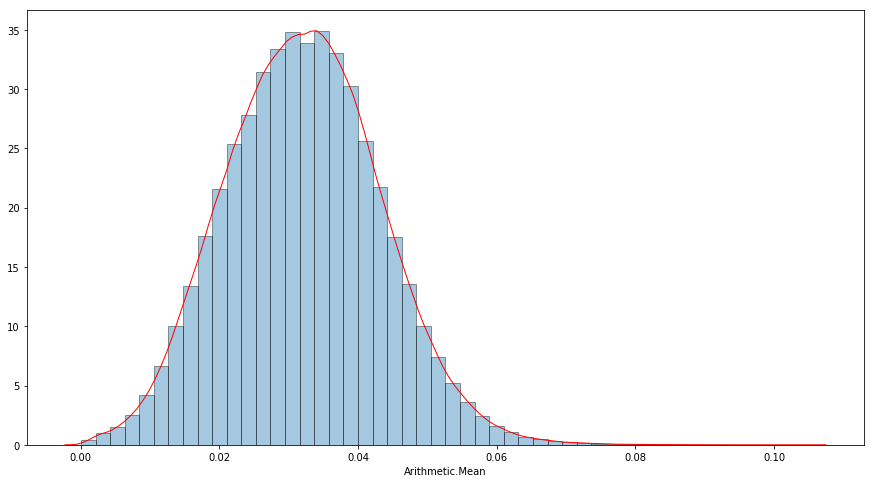

In [43]:
sns.distplot(Ozone_Data["Arithmetic.Mean"], hist=True, kde=True, 
             bins=50, 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 1, 'color': "red"})

Yet another simple thing we can ask is if there is a correlation between ozone levels and the Air Quality Index. We expect there to be one since ozone levels play a direct role in the calculation of the air quality index, as well as other gases. As such, we expect there to be a **strong, positive correlation**. We can verify this using the `corr()` function.

In [44]:
Ozone_Data["Arithmetic.Mean"].corr(Ozone_Data["AQI"])

0.8012037175789628

And indeed we get what we expected!

Now, while the Ozone Levels dataset on its own is proving to be rather interesting, our goal lies in investigating it side by side to our SpaceX Launches dataset. One way we can do this is geographically... however, the SpaceX Launches don't have Longitude and Latitude data. Even if they did, the launches at those sites would affect a range of different readings, not just the ones of the air stations close to them.

Looking back at our Ozone Data columns, we see that we have a County variable. Aha! That seems like a reasonable thing to use as a location identifier. The first thing we should do is take a look at the launch sites. We'll use the `unique()` function.

In [45]:
SpaceX_Launches["Launch Site"].unique()

array(['CCAFS LC-40', 'VAFB SLC-4E', 'KSC LC-39A', 'CCAFS SLC-40'],
      dtype=object)

There are only four sites here! In order to link our datasets geographically, we can find out what counties these sites are in and then create a new column. We're lucky - because there are only four sites, we can google where each of them is.

CCAFS LC-40 - Brevard County, Florida
VAFB SLC-4E - Santa Barbara County, California
KSC LC-39A - Brevard County, Flordia
CCAFS SLC-40 - Brevard County, Flordia

Wow, we're in luck! Only VAFB SLC-4E is in Santa Barbara; the others are in Brevard. How do we add this property to our dataset? We can add another column which depends on the Launch Site variable - if the value for that row is 'VAFB SLC-4E', we'll put 'Santa Barbara' in our new column for that row. Otherwise, we'll put in 'Brevard'.

We can acheieve this by creating a `lambda()` function.

In [46]:
SpaceX_Launches["County"] = SpaceX_Launches["Launch Site"].map(lambda x: "Santa Barbara" if x == "VAFB SLC-4E" else "Brevard")

Let's take a look at our SpaceX Launches dataset, now with the `County` column.

In [47]:
SpaceX_Launches.head()

,Flight Number,Time (UTC),Booster Version,Launch Site,Payload,Payload Mass (kg),Orbit,Customer,Mission Outcome,Landing Outcome,County
Date,,,,,,,,,,,
2010-06-04,1,18:45:00,F9 v1.0 B0003,CCAFS LC-40,Dragon Spacecraft Qualification Unit,-999,LEO,SpaceX,Success,Failure (parachute),Brevard
2010-12-08,2,15:43:00,F9 v1.0 B0004,CCAFS LC-40,"Dragon demo flight C1, two CubeSats, barrel o...",-999,LEO (ISS),NASA (COTS) NRO,Success,Failure (parachute),Brevard
2012-05-22,3,7:44:00,F9 v1.0 B0005,CCAFS LC-40,Dragon demo flight C2+,525,LEO (ISS),NASA (COTS),Success,No attempt,Brevard
2012-10-08,4,0:35:00,F9 v1.0 B0006,CCAFS LC-40,SpaceX CRS-1,500,LEO (ISS),NASA (CRS),Success,No attempt,Brevard
2013-03-01,5,15:10:00,F9 v1.0 B0007,CCAFS LC-40,SpaceX CRS-2,677,LEO (ISS),NASA (CRS),Success,No attempt,Brevard


Perfect! 

Now that we've prepped our SpaceX Launch dataset, we should turn our attention to cleaning up the Ozone Data. For one, we can change the name of the third column to a much easier to type 'Date'. 

In [48]:
Ozone_Data.head(2)

,Latitude,Longitude,Date.Local,Arithmetic.Mean,AQI,County
0,30.497478,-87.880258,2016-03-01,0.034273,37,Baldwin
1,30.497478,-87.880258,2016-03-02,0.025294,36,Baldwin


In [49]:
Ozone_Data = Ozone_Data.rename(index=str, columns={"Date.Local": "Date"})

Now let's take the opportunity to convert the index of the data frame into a `Datetime` object.

In [50]:
Ozone_Data["Date"] = Ozone_Data["Date"].astype('datetime64[ns]')
Ozone_Data = Ozone_Data.set_index('Date')
Ozone_Data.index = Ozone_Data.index.floor('1H')

As well, we can **subset** our data by county using conditional indices. Let's call the two subsetted datasets 'SB_Ozone', for 'Santa Barbara Ozone', and 'Brevard_Ozone' for the same reason.

In [51]:
SB_Ozone = Ozone_Data[Ozone_Data["County"] =='Santa Barbara']
Brevard_Ozone = Ozone_Data[Ozone_Data["County"] =='Brevard']

Since most of the stations are in Brevard, let's take a closer look at the Brevard Ozone data.

In [52]:
Brevard_Ozone.head()

,Latitude,Longitude,Arithmetic.Mean,AQI,County
Date,,,,,
2016-01-01,28.053611,-80.628611,0.021706,24,Brevard
2016-01-02,28.053611,-80.628611,0.023471,25,Brevard
2016-01-03,28.053611,-80.628611,0.024294,24,Brevard
2016-01-04,28.053611,-80.628611,0.035824,36,Brevard
2016-01-05,28.053611,-80.628611,0.042235,40,Brevard


Similarly, we can do the same thing for SpaceX Launch data, subsetting by county with conditional indices.

In [53]:
Brevard_Launches = SpaceX_Launches[SpaceX_Launches["County"] =='Brevard']
SB_Launches = SpaceX_Launches[SpaceX_Launches["County"] =='Santa Barbara']

Great! Now, we can look further into **data visualization**. We'll continue to use seaborn for this section.

Let's visualize the entire Ozone Dataset to see if we can glimpse any particularly interesting trends over time. As such, we first want our date on the x-axis.

Let's plot the ozone measurements on the y-axis.

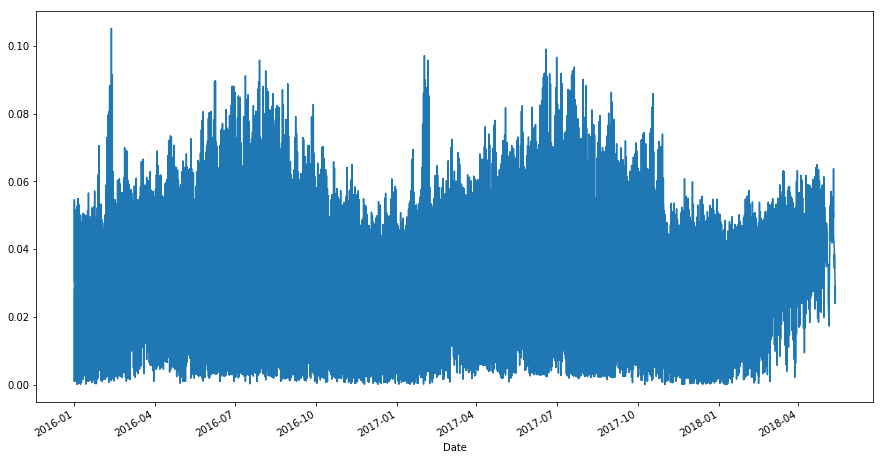

In [54]:
Ozone_Data["Arithmetic.Mean"].plot()

let's plot the data from agg_Ozone using the same metrics as before.

Whoa! That's very... solid. It seems that for the same day there are multiple measurements. This makes sense, as there are many sites all over the United States recording data at any given time. We can clean this up by aggregating the arithmetic mean of the measurements by their date and taking the average of all of them. We can do this using the `groupby()` function.

Let's put this into a new variable called `agg_Ozone`.

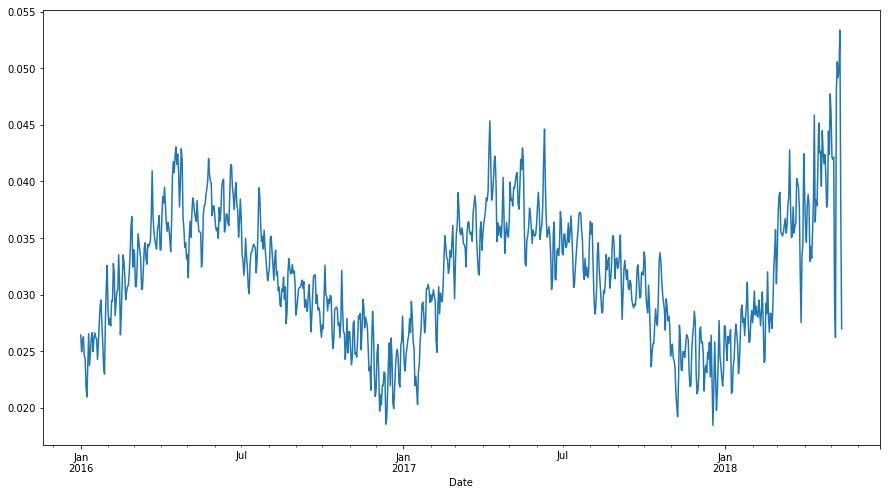

In [55]:
agg_Ozone = Ozone_Data["Arithmetic.Mean"].groupby(pd.Grouper(freq="d")).mean()
agg_Ozone.plot()

Much better! Now this pattern emerges much more clearly. It seems that, as a generalization to the entire United States, the ozone levels in the air feature a fall-and-rise pattern similar to a sinusoidal curve. The peaks seem to be in the late spring and the troughs in mid-winter.

Let's illustrate this trend more clearly by plotting a moving average alongside it.

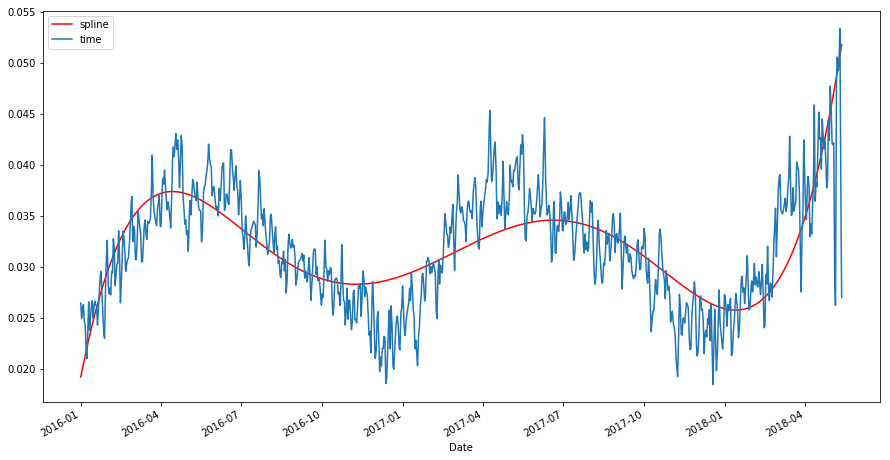

In [56]:
ts = agg_Ozone
ts[ts==-1] = np.nan
ts = ts.resample('T').mean()

real = ts.dropna()
interpolated = ts.interpolate(method='spline', order=5)
interpolated = interpolated.drop(real.index.values)
interpolated.plot(color="red")
ts.interpolate(method='time').plot()

lines, labels = plt.gca().get_legend_handles_labels()
labels = ['spline', 'time']
plt.legend(lines, labels, loc='best')
plt.show()

I played around with the order of the trendline a bit. You might have to play around with this!

So now that we have some idea of our measurements over time, let's investigate *where* our data is coming from. We have longitude and latitude, as well as county information, but that doesn't communicate where these groups are or tell us anything particularly intuitively.

To work with geographic data, let's install the **GeoPandas** package. We'll also install the **Descartes** package to show the maps.

In [57]:
!pip3 install geopandas descartes

You are using pip version 18.0, however version 18.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [58]:
import geopandas as gpd
from shapely.geometry import Point

The first step is to create a series full of point objects. Each one of these points contains the `Longitude` and `Latitude` of the `Ozone_Data`.

In [59]:
Ozone_Data['Coordinates'] = list(zip(Ozone_Data.Longitude, Ozone_Data.Latitude))
Ozone_Data['Coordinates'] = Ozone_Data['Coordinates'].apply(Point)
Ozone_Data['Coordinates'][:5]

Date
2016-03-01    POINT (-87.880258 30.497478)
2016-03-02    POINT (-87.880258 30.497478)
2016-03-03    POINT (-87.880258 30.497478)
2016-03-04    POINT (-87.880258 30.497478)
2016-03-05    POINT (-87.880258 30.497478)
Name: Coordinates, dtype: object

Let's make a special `GeoDataFrame` to hold the coordinates.

In [60]:
gdf = gpd.GeoDataFrame(Ozone_Data, geometry='Coordinates')

Now that we have our coordinates in a form that GeoPandas can read, we should import a default map for GeoPandas to plot on.

In [61]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,28400000.0,Asia,Afghanistan,AFG,22270.0,"POLYGON ((61.21081709172574 35.65007233330923,..."
1,12799293.0,Africa,Angola,AGO,110300.0,(POLYGON ((16.32652835456705 -5.87747039146621...
2,3639453.0,Europe,Albania,ALB,21810.0,"POLYGON ((20.59024743010491 41.85540416113361,..."
3,4798491.0,Asia,United Arab Emirates,ARE,184300.0,"POLYGON ((51.57951867046327 24.24549713795111,..."
4,40913584.0,South America,Argentina,ARG,573900.0,(POLYGON ((-65.50000000000003 -55.199999999999...


We are now ready to plot! Let's select the name of the country that we want to plot on!

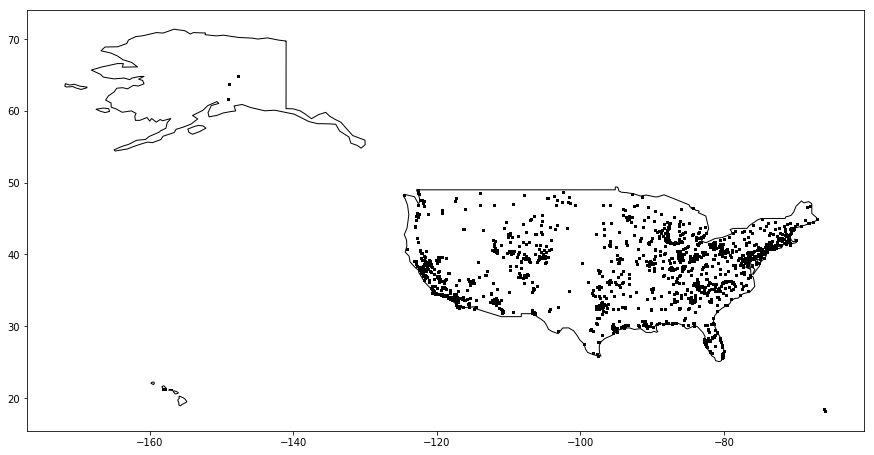

In [62]:
ax = world[world.name == 'United States'].plot(
    color='white', edgecolor='black')

# We can now plot our GeoDataFrame.
gdf.plot(ax=ax, color='black',markersize=1)

plt.show()

Hmmm, that looks pretty good! But we can do better. First of all, there are points outside of the continental US, we should get rid of those (SpaceX doesn't launch in Alaska). Next, it would be a lot better if we used a shapefile of the US to get better granularity.

In [63]:
states = gpd.read_file(path + "cb_2017_us_state_500k/cb_2017_us_state_500k.shp")

We should also fix the outlier points.

In [64]:
# Get rid of Guam, Mariana Islands and Virgin Islands
states = states[states.STATEFP.astype(int) < 60]
# Get rid of Hawaii and Alaska
states = states[~states.NAME.isin(['Hawaii', 'Alaska'])]
states.tail(5)

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry
49,28,01779790,0400000US28,28,MS,Mississippi,00,121530256608,3930182746,"(POLYGON ((-88.502966 30.215235, -88.491759 30..."
50,12,00294478,0400000US12,12,FL,Florida,00,138911437206,31398800291,"(POLYGON ((-80.176276 25.525054, -80.173949999..."
52,27,00662849,0400000US27,27,MN,Minnesota,00,206229176104,18944967530,"(POLYGON ((-89.59205799999999 47.966683, -89.5..."
53,01,01779775,0400000US01,01,AL,Alabama,00,131174431216,4592944701,"(POLYGON ((-88.053375 30.506987, -88.051087999..."
54,29,01779791,0400000US29,29,MO,Missouri,00,178052037005,2488190402,"POLYGON ((-95.773549 40.578205, -95.7685269999..."


In [65]:
gdf = gdf[(gdf["Latitude"] > 23) & (gdf["Latitude"] < 55)]

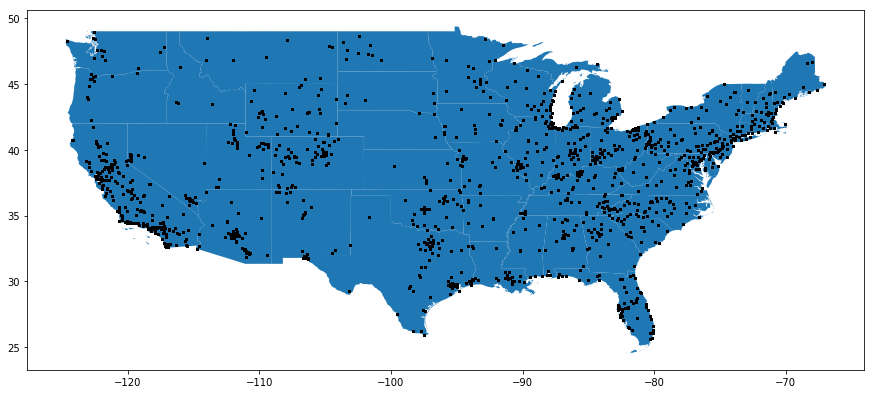

In [66]:
ax = states.plot()
# ax.axis('off')
gdf.plot(ax=ax, color='black',markersize=1)

plt.show()

Interesting!

For analysis purposes, we might want to split these data points off into groups or sections that clump together. We could vaguely see what these clumps might look like in the image above.

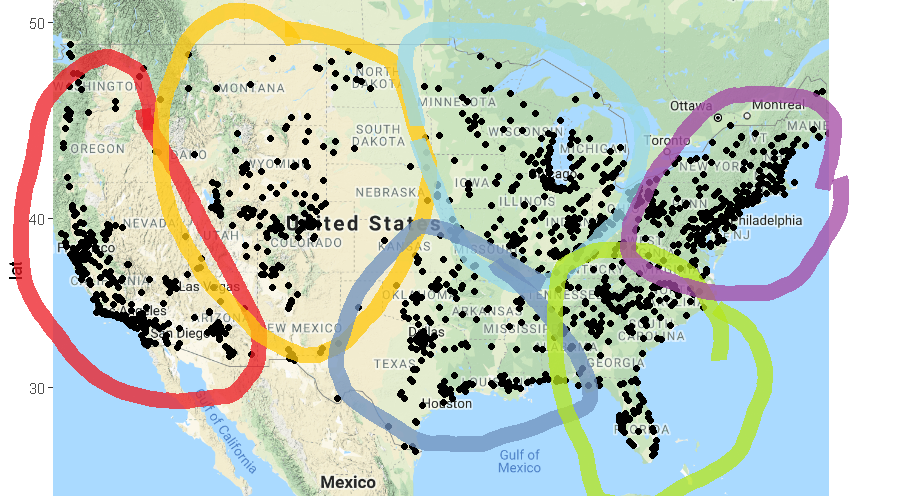

We're looking for roughly six 'clumps'. Ideally, we could add another column to our dataset which contains a number identifying which cluster that particular data point belongs to. 

A great way to do this is to **cluster** our data! We can use the built-in **k-means clustering algorithm** in R to help us do so. Let's save the results from the `kmeans()` function into a variable called clusters.

In [67]:
!pip3 install scikit-learn

You are using pip version 18.0, however version 18.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [68]:
import sklearn.cluster

In [69]:
coords = gdf[["Longitude","Latitude"]].values

In [70]:
model = sklearn.cluster.KMeans(n_clusters=6).fit(coords)

In [71]:
model.cluster_centers_

array([[ -82.75910772,   32.48162857],
       [-108.36990379,   38.68585462],
       [ -75.60518678,   41.00432551],
       [-119.41696689,   37.00378019],
       [ -94.96525667,   32.60034337],
       [ -88.59635349,   41.12506119]])

In [72]:
model.labels_

array([0, 0, 0, ..., 3, 3, 3], dtype=int32)

Nice! we have the centroids of the clusters. Let's do a quick check to see if there are 6 different labels.

In [73]:
set(model.labels_)

{0, 1, 2, 3, 4, 5}

Aaannd perfect! We can now put `model.labels_` into our data frame.

In [74]:
gdf["zone"] = model.labels_

Taking a look at our dataset now, we can see we have a new column that identifies which cluster the data point belongs to.

In [75]:
gdf.head()

,Latitude,Longitude,Arithmetic.Mean,AQI,County,Coordinates,zone
Date,,,,,,,
2016-03-01,30.497478,-87.880258,0.034273,37,Baldwin,POINT (-87.880258 30.497478),0
2016-03-02,30.497478,-87.880258,0.025294,36,Baldwin,POINT (-87.880258 30.497478),0
2016-03-03,30.497478,-87.880258,0.033353,39,Baldwin,POINT (-87.880258 30.497478),0
2016-03-04,30.497478,-87.880258,0.030059,36,Baldwin,POINT (-87.880258 30.497478),0
2016-03-05,30.497478,-87.880258,0.032176,44,Baldwin,POINT (-87.880258 30.497478),0


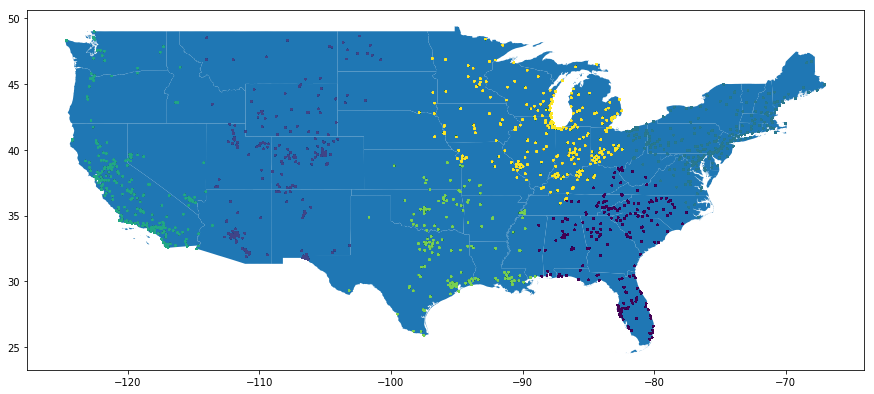

In [76]:
ax = states.plot()
gdf.plot(ax=ax, c=gdf.zone,markersize=1)

plt.show()

Voilà! That's our investigation into geographical data done. Now, let's turn our attention back to ozone data, this time specifically narrowing down our focus to Brevard County.

Once more, a **time-series** plot of the ozone in Brevard County is a useful visualization. We'll also add a trendline.

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:7620: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


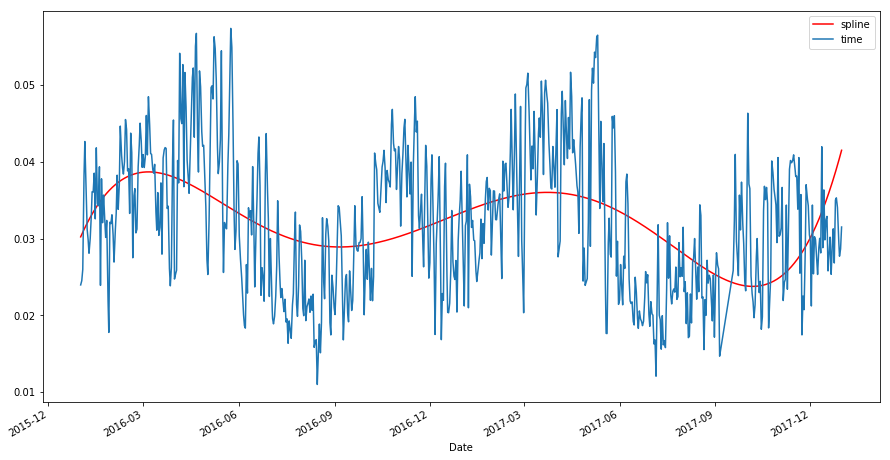

In [77]:
ts = Brevard_Ozone["Arithmetic.Mean"]
ts[ts==-1] = np.nan
ts = ts.resample('T').mean()

real = ts.dropna()
interpolated = ts.interpolate(method='spline', order=5)
interpolated = interpolated.drop(real.index.values)
interpolated.plot(color="red")
ts.interpolate(method='time').plot()

lines, labels = plt.gca().get_legend_handles_labels()
labels = ['spline', 'time']
plt.legend(lines, labels, loc='best')
plt.show()

Although the trendline we picked before was interesting, let's change it to a linear one by changing the `method` argument in the smooth geom to `lm`.

Let's investigate our aggregated data with a linear model.

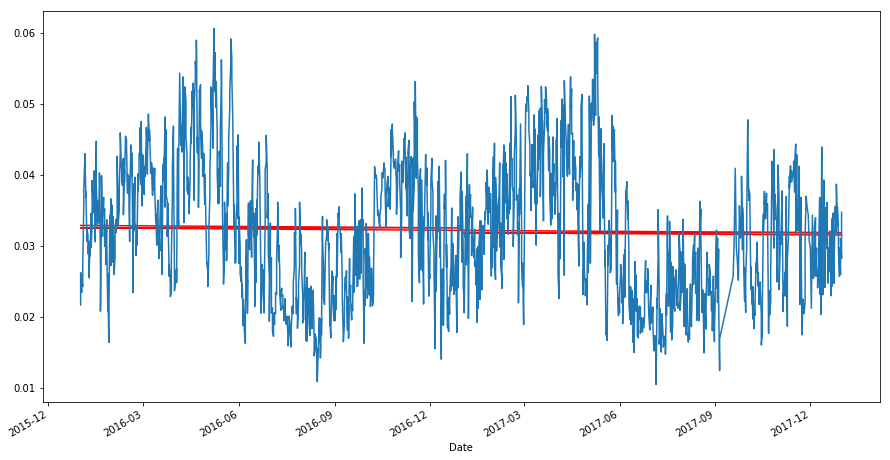

In [78]:
x = np.arange(len(Brevard_Ozone)) # = array([0, 1, 2, ..., 3598, 3599, 3600])
fit = np.polyfit(x, Brevard_Ozone["Arithmetic.Mean"], 1)
fit_fn = np.poly1d(fit)
plt.plot(Brevard_Ozone.index, fit_fn(x), 'r')
Brevard_Ozone["Arithmetic.Mean"].plot()

A slight decrease - interesting, but given the 'breathing' nature of our gas, probably largely insignificant.

Now, to get down to the meat of our investigation, we can finally combine the SpaceX and the Ozone Datasets. Let's merge the two Brevard datasets by Date using the `merge()` function. Let's call our resulting dataset `Brev_Ozone_Launch`.

In [79]:
Brev_Ozone_Launch = Brevard_Launches.join(Brevard_Ozone,on='Date', how='outer',lsuffix='_left', rsuffix='_right')
Brev_Ozone_Launch.head()

,Flight Number,Time (UTC),Booster Version,Launch Site,Payload,Payload Mass (kg),Orbit,Customer,Mission Outcome,Landing Outcome,County_left,Latitude,Longitude,Arithmetic.Mean,AQI,County_right
Date,,,,,,,,,,,,,,,,
2010-06-04,1,18:45:00,F9 v1.0 B0003,CCAFS LC-40,Dragon Spacecraft Qualification Unit,-999.0,LEO,SpaceX,Success,Failure (parachute),Brevard,NaN,NaN,NaN,NaN,NaN
2010-12-08,2,15:43:00,F9 v1.0 B0004,CCAFS LC-40,"Dragon demo flight C1, two CubeSats, barrel o...",-999.0,LEO (ISS),NASA (COTS) NRO,Success,Failure (parachute),Brevard,NaN,NaN,NaN,NaN,NaN
2012-05-22,3,7:44:00,F9 v1.0 B0005,CCAFS LC-40,Dragon demo flight C2+,525.0,LEO (ISS),NASA (COTS),Success,No attempt,Brevard,NaN,NaN,NaN,NaN,NaN
2012-10-08,4,0:35:00,F9 v1.0 B0006,CCAFS LC-40,SpaceX CRS-1,500.0,LEO (ISS),NASA (CRS),Success,No attempt,Brevard,NaN,NaN,NaN,NaN,NaN
2013-03-01,5,15:10:00,F9 v1.0 B0007,CCAFS LC-40,SpaceX CRS-2,677.0,LEO (ISS),NASA (CRS),Success,No attempt,Brevard,NaN,NaN,NaN,NaN,NaN


In [80]:
len(Brev_Ozone_Launch)

1447

Since there are a lot of launches, let's just see how the heaviest flights affect the ozone levels. Let's take a look at the distribution first to see if we can simply sample the highest weights.

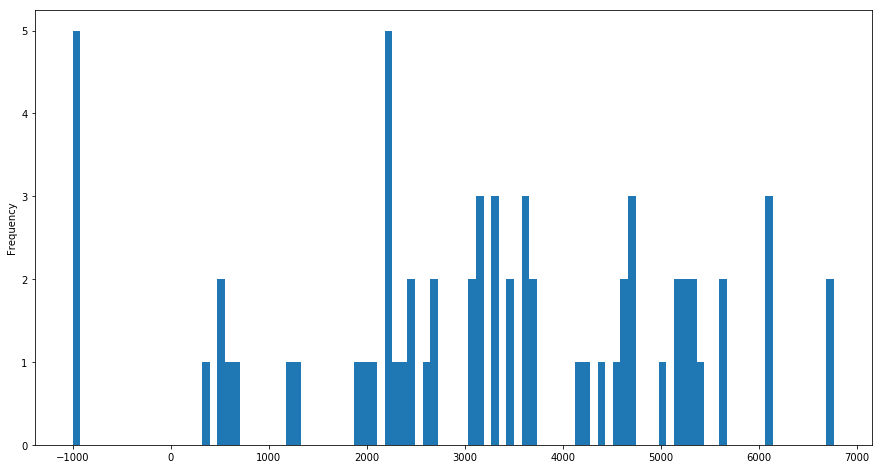

In [81]:
Brev_Ozone_Launch["Payload Mass (kg)"].plot.hist(bins = 100)

It seems like there are a significant amount of launches that have the same weight. SpaceX probably has their own internal grouping of masses. This explains why the frequency of launches isn't descrete. Since we won't have time to inspect how the heaviest 1500 launches affects the ozone levels, we will just take a sample of the top 1500 heaviest launches.

In [82]:
heaviest_launches = Brev_Ozone_Launch[Brev_Ozone_Launch["Payload Mass (kg)"] > 6000]
heaviest_launches = heaviest_launches[:5] # You could also use sample() here too. But we want consistent results.
heaviest_launches

,Flight Number,Time (UTC),Booster Version,Launch Site,Payload,Payload Mass (kg),Orbit,Customer,Mission Outcome,Landing Outcome,County_left,Latitude,Longitude,Arithmetic.Mean,AQI,County_right
Date,,,,,,,,,,,,,,,,
2017-05-15,34,23:21:00,F9 FT B1034,KSC LC-39A,Inmarsat-5 F4,6070.0,GTO,Inmarsat,Success,No attempt,Brevard,28.053611,-80.628611,0.038176,45.0,Brevard
2017-05-15,34,23:21:00,F9 FT B1034,KSC LC-39A,Inmarsat-5 F4,6070.0,GTO,Inmarsat,Success,No attempt,Brevard,28.310841,-80.615330,0.039882,46.0,Brevard
2017-07-05,38,23:38:00,F9 FT B1037,KSC LC-39A,Intelsat 35e,6761.0,GTO,Intelsat,Success,No attempt,Brevard,28.053611,-80.628611,0.016294,19.0,Brevard
2017-07-05,38,23:38:00,F9 FT B1037,KSC LC-39A,Intelsat 35e,6761.0,GTO,Intelsat,Success,No attempt,Brevard,28.310841,-80.615330,0.017353,20.0,Brevard
2018-03-06,50,5:33:00,F9 B4 B1044,CCAFS SLC-40,Hispasat 30W-6 PODSat,6092.0,GTO,Hispasat NovaWurks,Success,No attempt,Brevard,NaN,NaN,NaN,NaN,NaN


Excellent! Now let's plot a point for every flight.

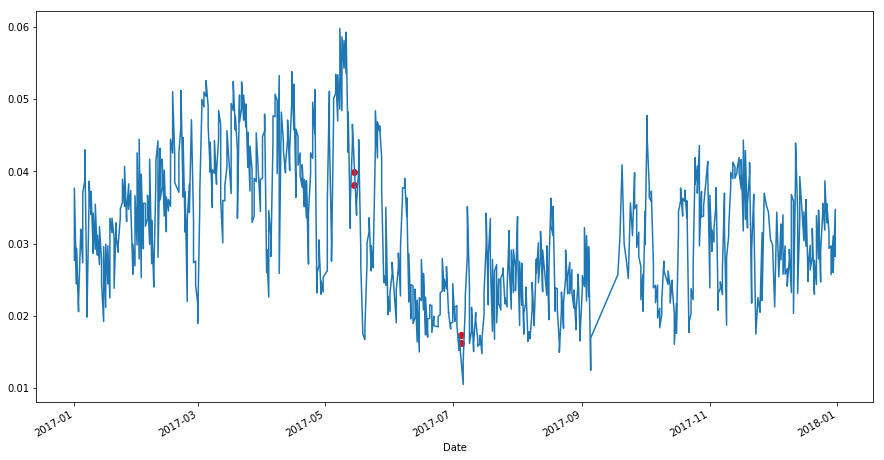

In [83]:
Brev_Ozone_Launch.loc["2017":]["Arithmetic.Mean"].plot()
y = heaviest_launches["Arithmetic.Mean"]
x = heaviest_launches.index
plt.scatter(x,y, marker='o',c="red")

Seems like the launches doesn't really affect the ozone levels. We'll need to do more investigation. But before we do, I just noticed that there is a gap in data between September 2017 and October 2017. Let's zoom in on this gap.

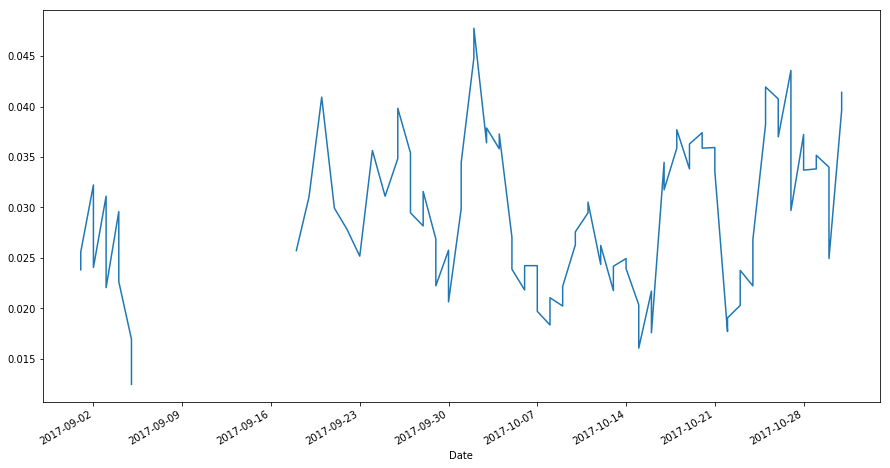

In [84]:
Brev_Ozone_Launch.loc["2017-09":"2017-10"]["Arithmetic.Mean"].plot()

Fortunately, the current measurements we're looking at does involve this time range. But it's important to inspect gaps in data like this! Often than not, you'll learn more about your data FROM these missing points. Go and find out what's wrong with this dataset between those times! (and post it in slack :) )

If you plot more launches onto the graph you'll find in some cases, there is a decrease, and in others, there is an increase, and what's more the severity of the increases and decreases varies too! However, overall, it seems that there is a decrease after the majority of launches...

So is it safe to say that SpaceX Launches *do* cause a decrease in the ozone? Not really. It seems we might want to take a closer look time-wise. Conveniently, we already have ozone data in hourly format! Let's import it now for the Brevard County.

The link to the dataset can be found [here](https://drive.google.com/file/d/1rQ4I1kzb519QE641oNLLAR2di56e_fcK/view?usp=sharing).

In [85]:
Brevard_Hourly = pd.read_csv(path + '2017 Hourly Brevard Data.csv')
Brevard_Hourly.head()

,Latitude,Longitude,Local Datetime (EDT),Sample Measurement (ppm)
0,28.053611,-80.628611,2017-01-01 5:00,0.007
1,28.310841,-80.615330,2017-01-01 5:00,0.032
2,28.053611,-80.628611,2017-01-01 6:00,0.006
3,28.310841,-80.615330,2017-01-01 6:00,0.026
4,28.053611,-80.628611,2017-01-01 7:00,0.002


Hmm... what an interesting dataset! Note that our Sample Measurement is in parts per million, and that our datetime
variable is taken in EDT.

Let's look at a summary of our data.

In [86]:
Brevard_Hourly.describe()

,Latitude,Longitude,Sample Measurement (ppm)
count,16275.000000,16275.000000,16275.000000
mean,28.181507,-80.622008,0.030497
std,0.128617,0.006641,0.012293
min,28.053611,-80.628611,0.000000
25%,28.053611,-80.628611,0.021000
50%,28.053611,-80.628611,0.030000
75%,28.310841,-80.615330,0.039000
max,28.310841,-80.615330,0.075000


In [87]:
Brevard_Hourly.dtypes

Latitude                    float64
Longitude                   float64
Local Datetime (EDT)         object
Sample Measurement (ppm)    float64
dtype: object

There doesn't seem to be anything too out of the ordinary here - however, our datetime variable is an object! We can verify this using the `.dtype` attribute.

In [88]:
Brevard_Hourly['Local Datetime (EDT)'].dtype

dtype('O')

Again, let's convert this column into the index.

In [89]:
Brevard_Hourly =  Brevard_Hourly.dropna()

In [90]:
Brevard_Hourly["Local Datetime (EDT)"] = pd.DatetimeIndex(Brevard_Hourly["Local Datetime (EDT)"])
Brevard_Hourly = Brevard_Hourly.set_index('Local Datetime (EDT)')

Since all our dates are in 2017, we'll want to take all the launches that occurred in Brevard in 2017 for our comparison. We can do this using conditional indices - let's put it into a variable called Launches17.

In [91]:
Launches17 = Brevard_Hourly.loc["2017"]

Out of curiosity, how many launches are we talking about? Using `len()` gives us our answer.

In [92]:
len(Launches17)

16275

Now, an interesting problem arises. Our launch data is in UTC, but our Ozone Data is in EDT. How can we reconcile this?<br><br>
We'll have to add 4 hours to the index of `Brevard_Hourly` because EDT is 4 hours behind UTC.

In [93]:
Brevard_Hourly.index = Brevard_Hourly.index + pd.Timedelta(hours=4)

Perfect! With all of that out of the way, we can finally start to plot our data.

Let's start with a simple line plot of hourly ozone levels in Brevard County.

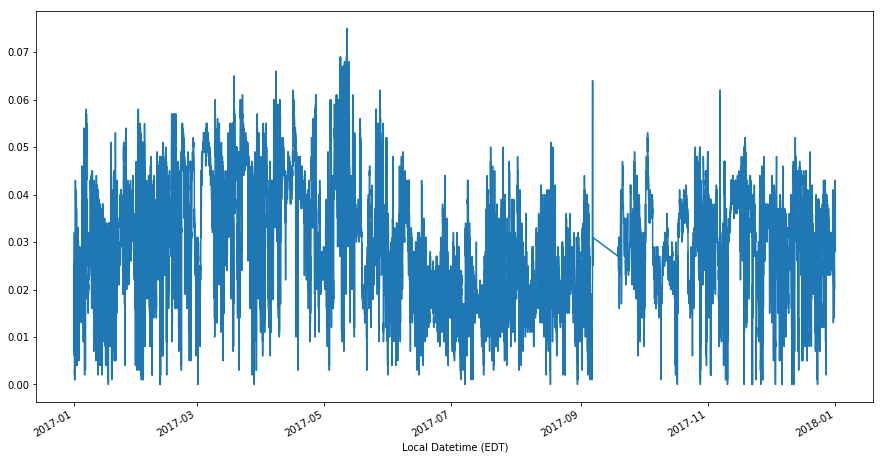

In [94]:
Brevard_Hourly["Sample Measurement (ppm)"].plot()

Let's plot this, alongside our smoothing line.

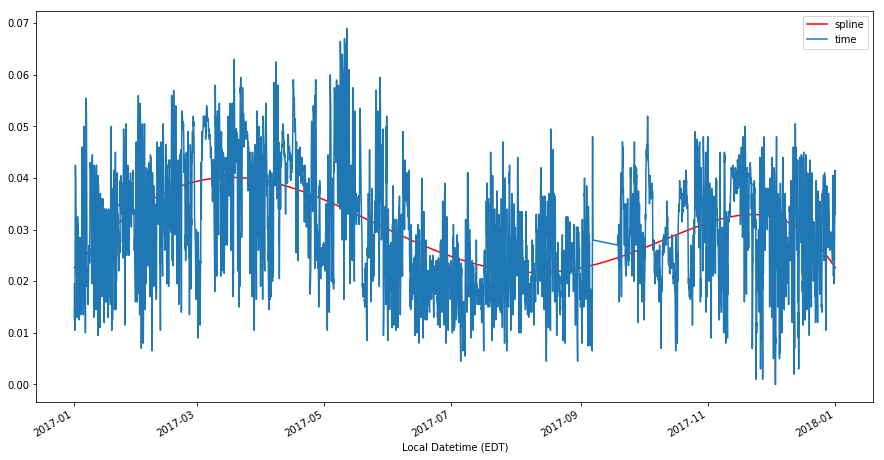

In [95]:
ts = Brevard_Hourly["Sample Measurement (ppm)"]
ts[ts==-1] = np.nan
ts = ts.resample('T').mean()

real = ts.dropna()
interpolated = ts.interpolate(method='spline', order=5)
interpolated = interpolated.drop(real.index.values)
interpolated.plot(color="red")
ts.interpolate(method='time').plot()

lines, labels = plt.gca().get_legend_handles_labels()
labels = ['spline', 'time']
plt.legend(lines, labels, loc='best')
plt.show()

A useful visualization might be to overlap the graph above with a semi-transparent rectangle that showcases where to look for the decreases of ozone.

These rectangles should:
1. Start at the launch time.
2. End after a 12-hour interval.
3. Stretch to the top and bottom of hour graph.

The start times are easy enough to fetch - they're just the datetime index. Let's put them in a variable called 'start'.

In [96]:
start = Launches17.index

The end times are a bit trickier. They consist of the start times with 12 hours (or 60\*60\*12 seconds) added to them.

In [97]:
end = start + pd.Timedelta(hours=12)

We can now put the start and end times into an easy-to-access data frame! Let's call it `rects`.

In [98]:
rects = pd.DataFrame({"start":start, "end": end})

Now let's create a function that will show us how the measured amount changes within the 12-hour range. The function will take in an array of rocket launch indexes and will plot all the readings on the same graph.

In [99]:
def visualizr(list_of_idx):
    for idx in list_of_idx:
        row = rects.iloc[idx]
        Brevard_Hourly["Sample Measurement (ppm)"].loc[row.start:row.end].plot()

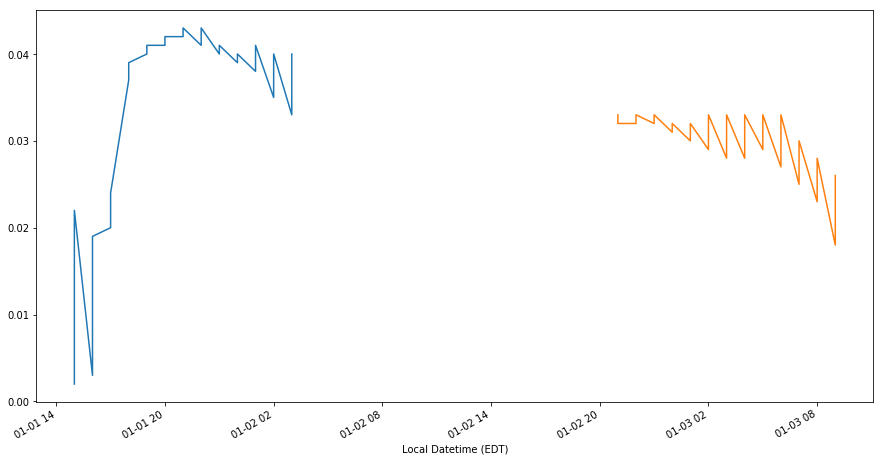

In [100]:
visualizr([20,80])

That's pretty cool! Let's add a line for each graph.

In [101]:
def visualizr_poly(list_of_idx):
    for idx in list_of_idx:
        row = rects.iloc[idx]
        
        
        ts = Brevard_Hourly["Sample Measurement (ppm)"].loc[row.start:row.end]
        ts[ts==-1] = np.nan
        ts = ts.resample('T').mean()

        real = ts.dropna()
        interpolated = ts.interpolate(method='spline', order=5)
        interpolated = interpolated.drop(real.index.values)
        interpolated.plot(color="red")
        ts.interpolate(method='time').plot()

        lines, labels = plt.gca().get_legend_handles_labels()
        labels = ['spline', 'time']
        plt.legend(lines, labels, loc='best')
        plt.show()

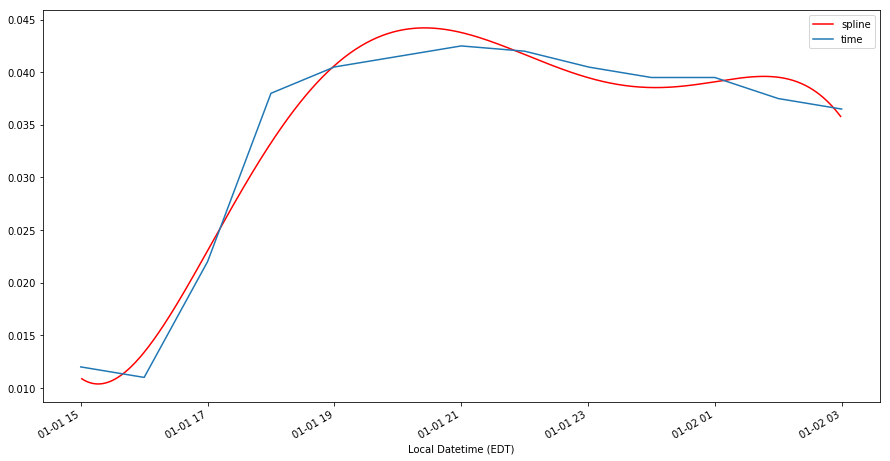

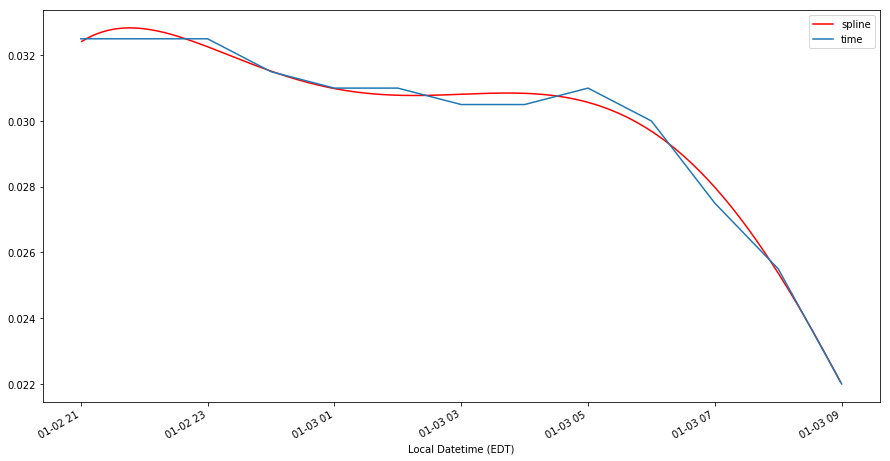

In [102]:
visualizr_poly([20,80])

Perhaps a linear one would be better (Think slope values).

In [103]:
def visualizr_line(list_of_idx):
    for idx in list_of_idx:
        row = rects.iloc[idx]
        
        rows = Brevard_Hourly["Sample Measurement (ppm)"].loc[row.start:row.end]
        x = np.arange(len(rows)) # = array([0, 1, 2, ..., 3598, 3599, 3600])
        fit = np.polyfit(x, rows, 1)
        fit_fn = np.poly1d(fit)
        plt.plot(rows.index, fit_fn(x), 'r')
        rows.plot()

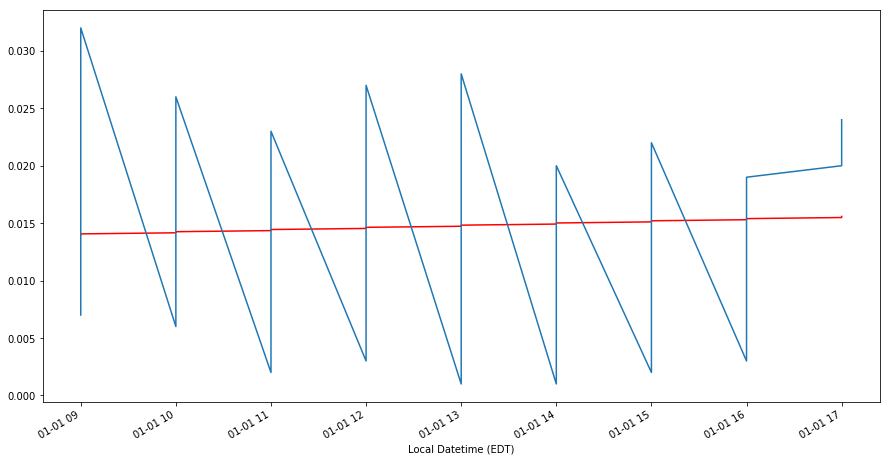

In [104]:
visualizr_line([1])

You can play around with this and investigate all of the launches.

The eleventh launch might produce similar results.

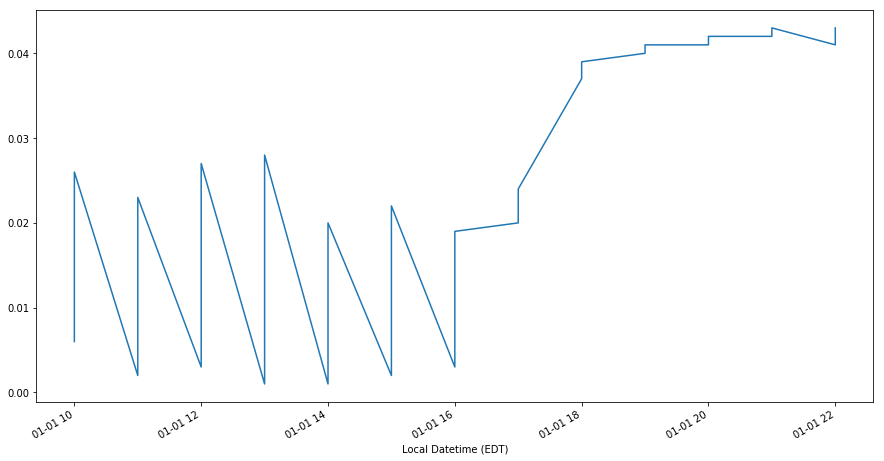

In [105]:
visualizr([11])

There doesn't seem to be any consistent trends! Further analysis would be needed.
For now, though, let's turn our attention to another question - the question of nitrogen dioxide. SpaceX Launches tend to release nitrogen dioxide, which is associated with a decrease in ozone.
Let's see if we can see this decrease in action!

The first step is to once again use read_csv() to import the Nitrogen Dioxide levels dataset from 2016 to 2018.

In [106]:
Nitrogen_Data = pd.read_csv(path + 'The Four Gases in Cohorts/Nitrogen Dioxide/Nitrogen Dioxide levels from 2016 to 2018.csv')

Let's take a look at the first six rows of our dataset.

In [107]:
Nitrogen_Data.head()

,State.Code,County.Code,Site.Num,Parameter.Code,POC,Latitude,Longitude,Datum,Parameter.Name,Sample.Duration,...,AQI,Method.Code,Method.Name,Local.Site.Name,Address,State.Name,County.Name,City.Name,CBSA.Name,Date.of.Last.Change
0,1,73,23,42602,1,33.553056,-86.815,WGS84,Nitrogen dioxide (NO2),1 HOUR,...,4,200,Teledyne-API Model 200EUP or T200UP - Photolyt...,North Birmingham,"NO. B'HAM,SOU R.R., 3009 28TH ST. NO.",Alabama,Jefferson,Birmingham,"Birmingham-Hoover, AL",2017-03-22
1,1,73,23,42602,1,33.553056,-86.815,WGS84,Nitrogen dioxide (NO2),1 HOUR,...,25,200,Teledyne-API Model 200EUP or T200UP - Photolyt...,North Birmingham,"NO. B'HAM,SOU R.R., 3009 28TH ST. NO.",Alabama,Jefferson,Birmingham,"Birmingham-Hoover, AL",2017-03-22
2,1,73,23,42602,1,33.553056,-86.815,WGS84,Nitrogen dioxide (NO2),1 HOUR,...,19,200,Teledyne-API Model 200EUP or T200UP - Photolyt...,North Birmingham,"NO. B'HAM,SOU R.R., 3009 28TH ST. NO.",Alabama,Jefferson,Birmingham,"Birmingham-Hoover, AL",2017-03-22
3,1,73,23,42602,1,33.553056,-86.815,WGS84,Nitrogen dioxide (NO2),1 HOUR,...,6,200,Teledyne-API Model 200EUP or T200UP - Photolyt...,North Birmingham,"NO. B'HAM,SOU R.R., 3009 28TH ST. NO.",Alabama,Jefferson,Birmingham,"Birmingham-Hoover, AL",2017-03-22
4,1,73,23,42602,1,33.553056,-86.815,WGS84,Nitrogen dioxide (NO2),1 HOUR,...,26,200,Teledyne-API Model 200EUP or T200UP - Photolyt...,North Birmingham,"NO. B'HAM,SOU R.R., 3009 28TH ST. NO.",Alabama,Jefferson,Birmingham,"Birmingham-Hoover, AL",2017-03-22


It looks pretty similar to before! Let's look at the column names again.

In [108]:
Nitrogen_Data.columns

Index(['State.Code', 'County.Code', 'Site.Num', 'Parameter.Code', 'POC',
       'Latitude', 'Longitude', 'Datum', 'Parameter.Name', 'Sample.Duration',
       'Pollutant.Standard', 'Date.Local', 'Units.of.Measure', 'Event.Type',
       'Observation.Count', 'Observation.Percent', 'Arithmetic.Mean',
       'X1st.Max.Value', 'X1st.Max.Hour', 'AQI', 'Method.Code', 'Method.Name',
       'Local.Site.Name', 'Address', 'State.Name', 'County.Name', 'City.Name',
       'CBSA.Name', 'Date.of.Last.Change'],
      dtype='object')

Before we only the columns we might need, let's check the units of measurement again. After all, it could very well be different from the units of measurement of ozone levels.

In [109]:
Nitrogen_Data["Units.of.Measure"].unique()

array(['Parts per billion'], dtype=object)

Indeed it is! The concentration of nitrogen dioxide is measured in units a thousand times smaller than that of ozone measurements! We can rectify this by simply dividing the arithmetic mean measurements of nitrogen dioxide by a thousand to get our measurements in parts per million.

In [110]:
Nitrogen_Data["Arithmetic.Mean"] = Nitrogen_Data["Arithmetic.Mean"]/1000

Now we can filter out the other columns!

In [111]:
Nitrogen_Data = Nitrogen_Data[['Latitude', 'Longitude', 'Date.Local', 'Arithmetic.Mean', 'AQI']]

Let's take a look at our new dataset.

In [112]:
Nitrogen_Data.head()

,Latitude,Longitude,Date.Local,Arithmetic.Mean,AQI
0,33.553056,-86.815,2016-01-01,0.002521,4
1,33.553056,-86.815,2016-01-02,0.008438,25
2,33.553056,-86.815,2016-01-03,0.012750,19
3,33.553056,-86.815,2016-01-04,0.003142,6
4,33.553056,-86.815,2016-01-05,0.009317,26


Now, suppose we wanted to merge the ozone dataset and the nitrogen dataset. Before we do this, we should change the name of the `AQI` levels and the arithmetic mean measurements to remind us that they pertain to nitrogen dioxide measurements.

We might also want to make the `Date` variable easier to access!

In [113]:
Nitrogen_Data = Nitrogen_Data.rename(index=str, columns={"Date.Local": "Date", "Arithmetic.Mean" : "Nitrogen.Mean", "AQI": "Nitrogen.AQI"})

Let's do the same thing with the ozone arithmetic mean and the ozone `AQI`. Taking a look at the names:

In [114]:
Ozone_Data.columns

Index(['Latitude', 'Longitude', 'Arithmetic.Mean', 'AQI', 'County',
       'Coordinates'],
      dtype='object')

We see we should change the fourth and fifth ones.

In [115]:
Ozone_Data = Ozone_Data.rename(index=str,columns={"Arithmetic.Mean" : 'Ozone.Mean', "AQI":"Ozone.AQI" })

Now, we're ready to merge our two datasets! To ensure these are readings that happened at the same time and the same place, let's merge them by `Longitude`, `Latitude`, and `Date`.

In [116]:
Ozone_Data["Date"] = Ozone_Data.index.astype('datetime64[ns]')

In [117]:
Nitrogen_Data["Date"] = Nitrogen_Data["Date"].astype('datetime64[ns]')
Nitrogen_Data = Nitrogen_Data.set_index('Date')
Nitrogen_Data.index = Nitrogen_Data.index.floor('1H')

In [118]:
Nitrogen_Data.index

DatetimeIndex(['2016-01-01', '2016-01-02', '2016-01-03', '2016-01-04',
               '2016-01-05', '2016-01-06', '2016-01-07', '2016-01-08',
               '2016-01-09', '2016-01-10',
               ...
               '2018-03-22', '2018-03-23', '2018-03-24', '2018-03-25',
               '2018-03-26', '2018-03-27', '2018-03-28', '2018-03-29',
               '2018-03-30', '2018-03-31'],
              dtype='datetime64[ns]', name='Date', length=324330, freq=None)

In [119]:
Nitrogen_Data["Date"] = Nitrogen_Data.index

In [120]:
Gas_Data = pd.merge(Ozone_Data, Nitrogen_Data, left_on=['Longitude', 'Latitude', 'Date'],right_on=['Longitude', 'Latitude', 'Date'])

/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2963: FutureWarning: 'Date' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version
  exec(code_obj, self.user_global_ns, self.user_ns)


Now, we can visualize ozone levels vs. nitrogen levels!

In [121]:
Gas_Data.head()

,Latitude,Longitude,Ozone.Mean,Ozone.AQI,County,Coordinates,Date,Nitrogen.Mean,Nitrogen.AQI
0,33.553056,-86.815,0.023882,25,Jefferson,POINT (-86.815 33.553056),2016-01-01,0.002521,4
1,33.553056,-86.815,0.012471,28,Jefferson,POINT (-86.815 33.553056),2016-01-02,0.008438,25
2,33.553056,-86.815,0.021353,24,Jefferson,POINT (-86.815 33.553056),2016-01-03,0.012750,19
3,33.553056,-86.815,0.025765,26,Jefferson,POINT (-86.815 33.553056),2016-01-04,0.003142,6
4,33.553056,-86.815,0.021353,28,Jefferson,POINT (-86.815 33.553056),2016-01-05,0.009317,26


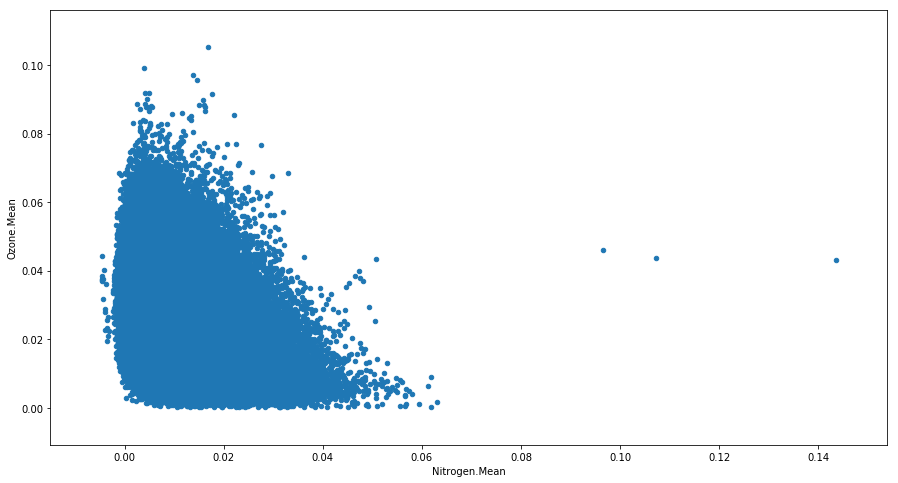

In [122]:
Gas_Data[["Nitrogen.Mean","Ozone.Mean"]].plot.scatter(x="Nitrogen.Mean",y="Ozone.Mean")

Our graph is being squished to allow for those outliers waaaay out right. To get around this, let's use the set_xlim() function to limit our graph to showing only the bulk of our data.

Keep in mind that outliers may be important and it's not a good idea to just disregard them - however, in this case, it'll help our visualization.

(0, 0.06)

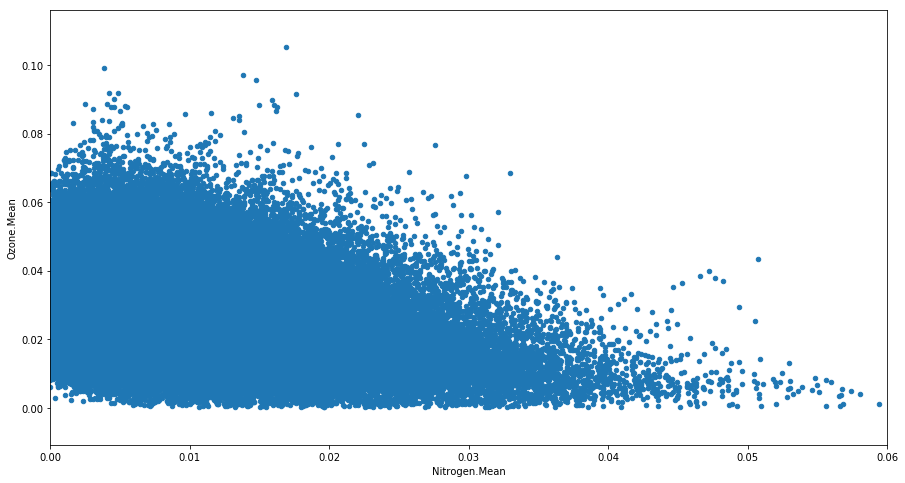

In [123]:
Gas_Data[["Nitrogen.Mean","Ozone.Mean"]].plot.scatter(x="Nitrogen.Mean",y="Ozone.Mean").set_xlim([0,0.06])

Another problem here is with **overplotting**. Overplotting has many different approaches, but the one we can use is to decrease the **alpha** and size of the points. We'll use Seaborn for this to simplify things.

(0, 0.06)

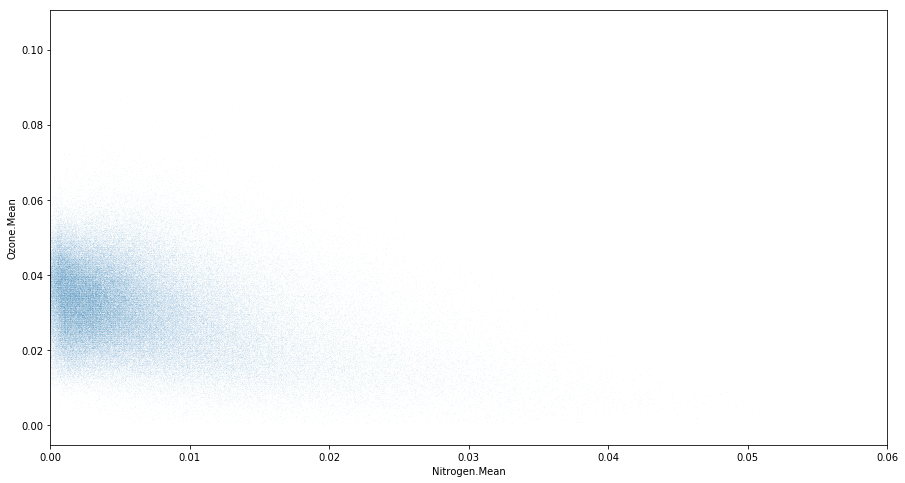

In [124]:
Gas_Data[["Nitrogen.Mean","Ozone.Mean"]].plot.scatter(x="Nitrogen.Mean",y="Ozone.Mean",alpha=0.1,s=0.01).set_xlim([0,0.06])

(0, 0.06)

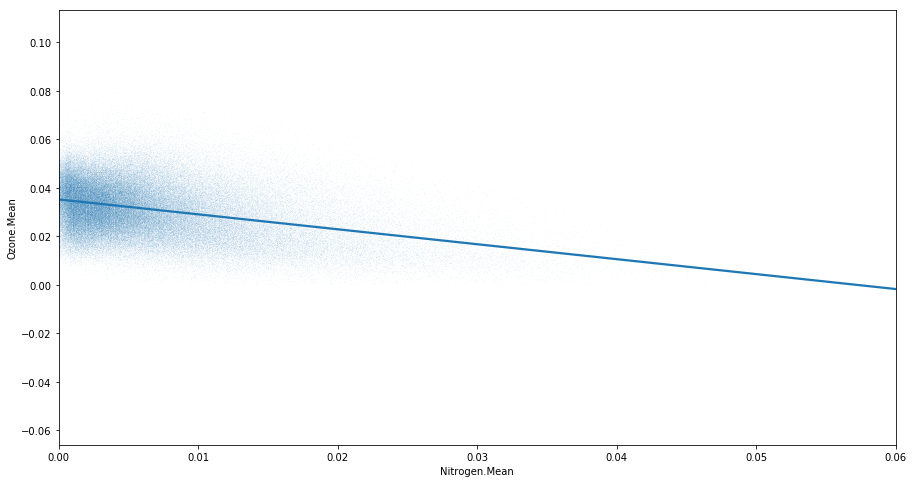

In [125]:
sns.regplot(x='Nitrogen.Mean', y='Ozone.Mean', data=Gas_Data,scatter_kws={'alpha':0.1,'s':0.01}, ci=None).set_xlim([0,0.06])

That's fantastic, but we could use a bit more information. After all, while the downward trend does seem to be promising, the huge blob at the beginning doesn't seem to have a preference in a certain direction. Our R-squared value could indicate that this downward trend is actually not as promising as we'd like.

To find out for sure, we can calculate the formula for this line ourselves!

A **linear regression line** takes the form of 

$$ \begin{equation} y = mx + b\end{equation} $$

as

$$ \hat{Y}_i =  \hat{\beta}_1 X_i + \hat{\beta}_0 + \hat{\epsilon}_i $$

Where B1 is the slope of the equation, B0 is the y-intercept, and the epsilon (e) is the error.

To find the slope, we find the **covariance** between the two variables and divide by the **variance** of the x variable.

$$ \begin{equation}
\hat{\beta}_1 = \frac{\sum(X_i – \bar{X}) (Y_i – \bar{Y})} {\sum(X_i – \bar{X})^2}
\end{equation} $$

Luckily, those are easy to find using the Pandas functions **covar()** and **var()**!
Let's save them in the variables xycovar and xvar respectively.<br>
*Note: we are using the `iloc` because Pandas' `cov()` function returns a covariance matrix*

In [126]:
xycovar = Gas_Data[["Nitrogen.Mean","Ozone.Mean"]].cov().iloc[0][1]
xvar = Gas_Data["Nitrogen.Mean"].var()

And the slope will just be their quotient! Let's save it in a variable called `lin_slope`.

In [127]:
lin_slope=xycovar/xvar

Now, we can calculate the y-intercept.

It's given by the equations:

$$ \begin{equation}
\hat{\beta}_0 = \bar{Y} – \hat{\beta}_1 \bar{X}
\end{equation} $$

Wherein the bars indicate a **sample mean**. Notice how we can use our previous slope calculation here! This is once again made easy with Pandas' built-in **mean()** function.
Let's save this value in a variable called lin_y_int.

In [128]:
lin_y_int = Gas_Data["Ozone.Mean"].mean() - Gas_Data["Nitrogen.Mean"].mean()*lin_slope

Now, we have enough information to plot this on our graph! We'll make a new function called `abline()` to plot the line based on a slope and intercept.

In [129]:
def abline(slope, intercept):
    """Plot a line from slope and intercept"""
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, '-')

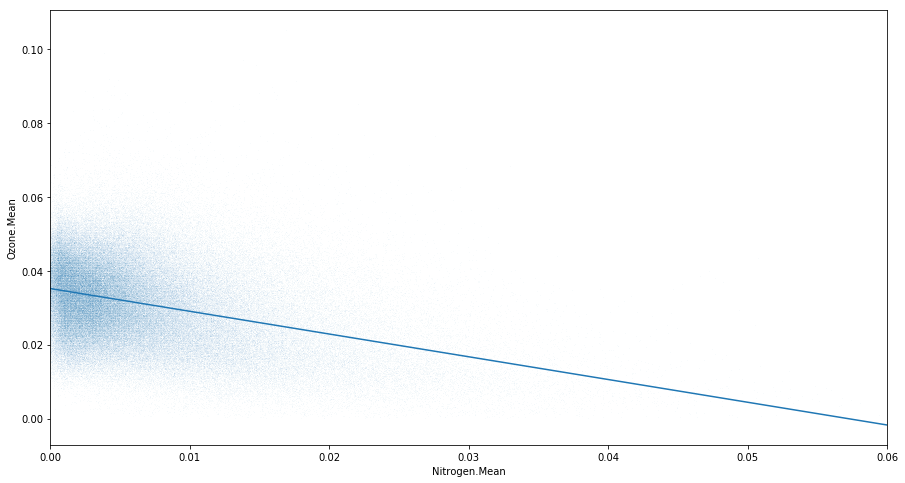

In [130]:
Gas_Data[["Nitrogen.Mean","Ozone.Mean"]].plot.scatter(x="Nitrogen.Mean",y="Ozone.Mean",alpha=0.1,s=0.01).set_xlim([0,0.06])
abline(lin_slope,lin_y_int)

Excellent! It looks just like what we had with seaborn! 

Now we get to the critical part. The R of a plot gives us the strength of the correlation - the R-squared is, intuitively, that value squared.

The R squared value tells us how much of the variance in the y variable is explained by the variance in the x variable. The larger it is, the more the variances are correlated.

To get the R, let's write our own function that takes in two vectors and gives us their R.

The formula is given as:

\begin{equation}
\frac{n \sum(XY) - \sum(X)\sum(Y)} {\sqrt{(n\sum(X^2) - \sum(X)^2) (n\sum(Y^2) - \sum(Y)^2)}}
\end{equation}

Where n is the number of elements in our sample.

*If the notation confuses you, please check out our stats workshop!*

We can make the task more readable and easy by having a top (numerator) and bottom (denominator) to our calculation and dividing those.

In [131]:
def get_r(x,y):
    sumx = sum(x)
    sumy = sum(y)
    
    top = (len(x)*sum(x*y)) - (sumx*sumy)
    bottom = (len(x)*sum(x*x)-sumx*sumx)*(len(y)*sum(y*y)-sumy*sumy)
    return(top/bottom)

Next, all we have to do is to use our function and save the result in a variable - let's call it `r_cof`.

In [132]:
r_cof = get_r(Gas_Data["Nitrogen.Mean"], Gas_Data["Ozone.Mean"])

Let's take a look at the R and R-squared values!

In [133]:
print(r_cof)
print(r_cof*r_cof)

-7.999476078403054e-08
6.399161752894271e-15


Excellent.

Let's list the slope, y-intercept, the R-squared value, and the R value!

In order not to make our numbers unruly, we can round to three significant figures.

Note that `\n` results in a line break, so putting that before each value makes your label more compact and easier to read.

Save your label in a variable called `line_stats`.

Text(0.5,0.5,'Y-Int: 0.0352\nR: -8e-08\nR-Squared: 6.4e-15')

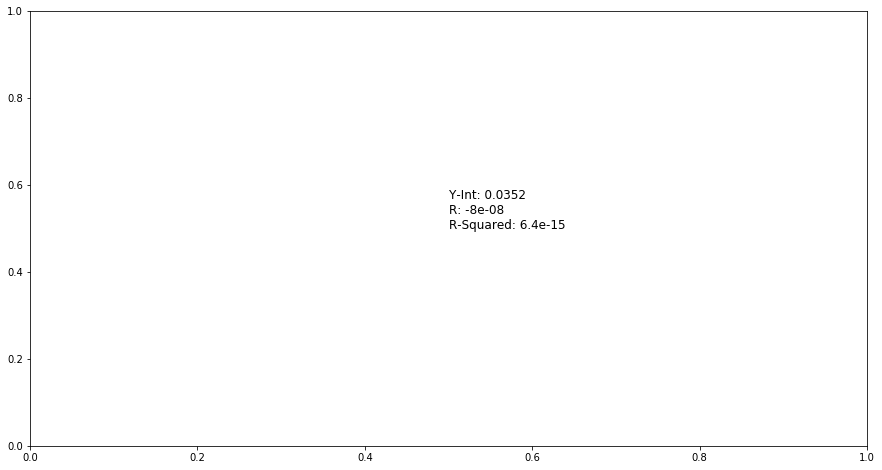

In [134]:
line_stats = "Y-Int: " + str(float('%.3g' % lin_y_int)) + "\nR: " + str(float('%.3g' % r_cof)) + "\nR-Squared: " + str(float('%.3g' % (r_cof*r_cof)))
plt.text(0.5, 0.5, line_stats, fontsize=12)

Lastly, we can simply put our label on a place where it will fit nicely on the graph!

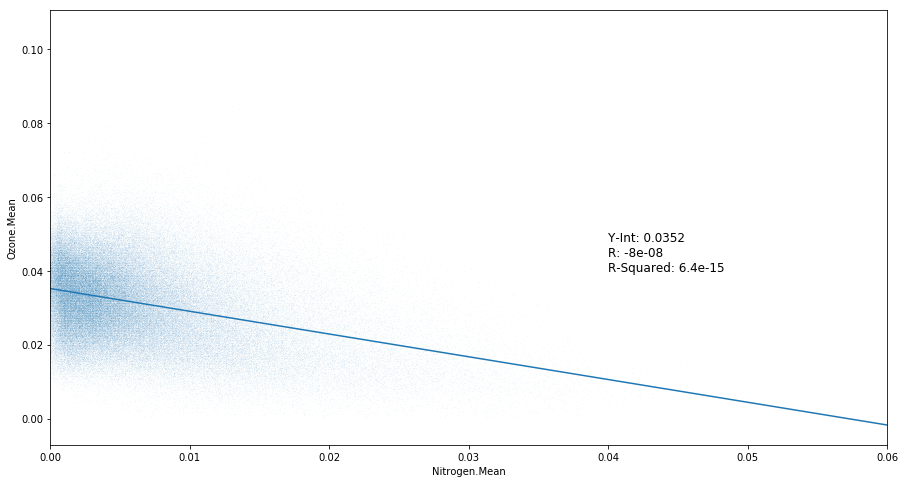

In [135]:
Gas_Data[["Nitrogen.Mean","Ozone.Mean"]].plot.scatter(x="Nitrogen.Mean",y="Ozone.Mean",alpha=0.1,s=0.01).set_xlim([0,0.06])
plt.text(0.04, 0.04, line_stats, fontsize=12)
abline(lin_slope,lin_y_int)

And that brings this example to an end.

We have found that ozone levels remain unaffected after SpaceX Launches, and that nitrogen levels appear to have a negative relationship with ozone levels - although it's far from a perfect relationship, as there are a lot of data that are unaccounted for.

As a disclaimer, this example has major flaws. Your projects should be much more thorough in investigating significance, and you can pull data from a variety of sources.